In [1]:
import pandas as pd
from scrape_flight_crl import parse_flights, get_arrivals, get_departures, reshape_with_weekday_column

In [2]:
flights_df = parse_flights(url="backup/url_2017-11-19T22.html")

In [3]:
arrivals, departures = reshape_with_weekday_column(get_arrivals(flights_df)), reshape_with_weekday_column(get_departures(flights_df))

In [4]:
from calendar import day_abbr
list(day_abbr)

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [5]:
from calendar import day_abbr
weekday_map = dict(zip(day_abbr, range(len(day_abbr))))
arrivals.copy()
def replace_day_with_number(df, inplace=False):
    if inplace:
        df.weekday = df.weekday.replace({k+".": v for k, v in weekday_map.items()})
    else:
        df_new = df.copy()
        df_new.weekday = df_new.weekday.replace({k+".": v for k, v in weekday_map.items()})
        return df_new

def replace_number_with_day(df, inplace=False):
    if inplace:
        df.weekday = df.weekday.replace({v: k for k, v in weekday_map.items()})
    else:
        df_new = df.copy()
        df_new.weekday = df_new.weekday.replace({v: k for k, v in weekday_map.items()})
        return df_new

In [6]:
arrivals_num = replace_day_with_number(arrivals)
arrivals_num.head()
# arrivals_name = replace_number_with_day(arrivals_num)
# arr_week_name.head()

,connection,#,Flightnr.,Depart,Arrive,Start,End,weekday
0,Agadir->CRL,0,FR8173,09:45,14:35,2017-10-30,2017-12-22,0
1,Agadir->CRL,4,FR8173,09:45,14:35,2018-08-01,2018-03-23,0
2,Agadir->CRL,5,FR8173,11:15,16:05,2018-01-01,2018-01-01,0
3,Agadir->CRL,1,FR8173,09:45,14:35,2017-12-19,2017-12-19,1
4,Agadir->CRL,3,FR8173,09:45,14:35,2018-02-01,2018-02-01,1


In [7]:
for df in (arrivals, departures):
    replace_day_with_number(df, inplace=True)

In [8]:
arr_week, dep_week = arrivals.groupby("weekday").count(), departures.groupby("weekday").count()

In [9]:
arr_week

,connection,#,Flightnr.,Depart,Arrive,Start,End
weekday,,,,,,,
0,157,157,157,157,157,157,157
1,153,153,153,153,153,153,153
2,175,175,175,175,175,175,175
3,147,147,147,147,147,147,147
4,149,149,149,149,149,149,149
5,146,146,146,146,146,146,146
6,173,173,173,173,173,173,173


In [10]:
dep_week

,connection,#,Flightnr.,Depart,Arrive,Start,End
weekday,,,,,,,
0,165,165,165,165,165,165,165
1,155,155,155,155,155,155,155
2,201,201,201,201,201,201,201
3,152,152,152,152,152,152,152
4,160,160,160,160,160,160,160
5,150,150,150,150,150,150,150
6,178,178,178,178,178,178,178


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

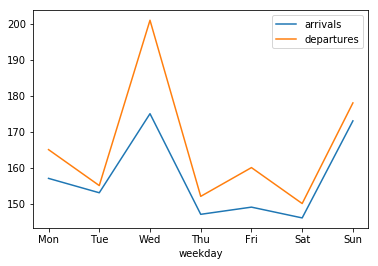

In [25]:
fig, ax = plt.subplots()
arr_week.plot(x=arr_week.index, y='#', ax=ax, legend=False, label="arrivals")
dep_week.plot(x=dep_week.index, y='#', ax=ax, legend=False, label="departures")
ax.set_xticklabels([None, *day_abbr])
ax.legend();

In [ ]:
# most_connection(departures) # TODO